In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


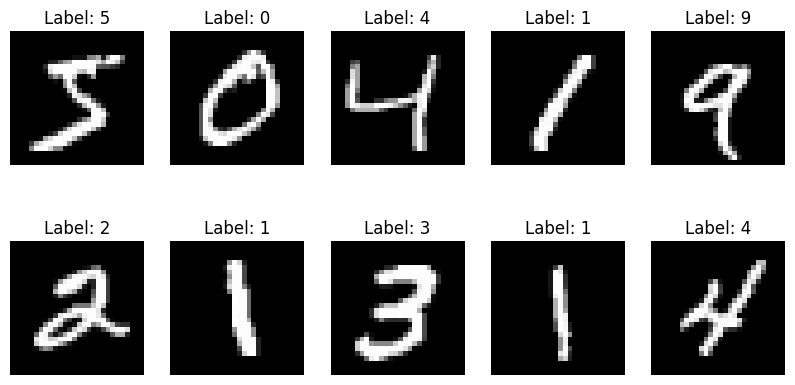

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

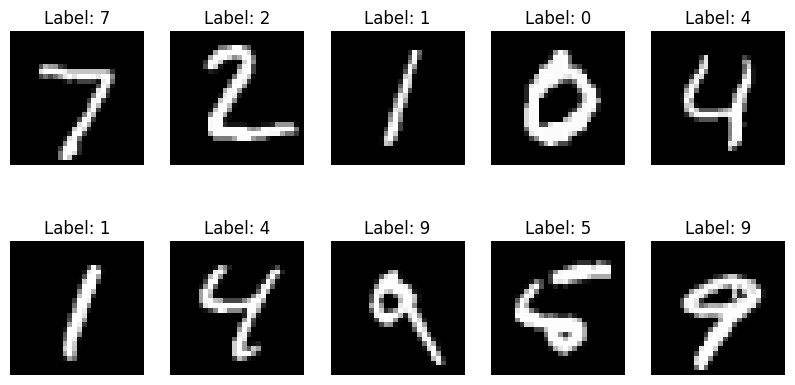

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


KNN Validation Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



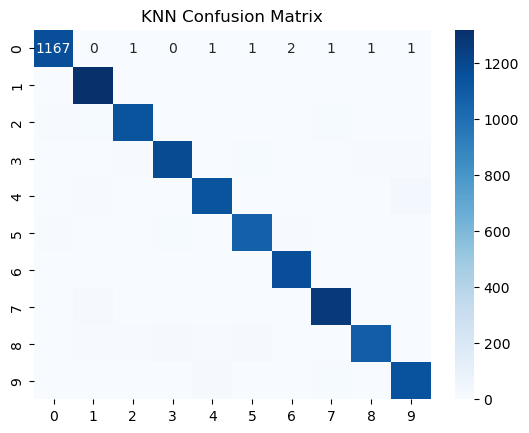

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
y_test_pred_svm = svm_model.predict(X_test_flat)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_split, y_train_split)

y_val_pred_dt = dt.predict(X_val)

dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'KNN Validation Accuracy: {dt_acc:.4f}')

print(classification_report(y_val, y_val_pred_dt))
sns.heatmap(confusion_matrix(y_val, y_val_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_split, y_train_split)

y_val_pred_lr = lr.predict(X_val)

lr_acc = accuracy_score(y_val, y_val_pred_lr)
print(f'KNN Validation Accuracy: {lr_acc:.4f}')

print(classification_report(y_val, y_val_pred_lr))
sns.heatmap(confusion_matrix(y_val, y_val_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_split, y_train_split)

y_val_pred_rf = rf.predict(X_val)

rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(rf_acc)

In [ ]:
print(classification_report(y_val, y_val_pred_rf))
sns.heatmap(confusion_matrix(y_val, y_val_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_split,y_train_split)
y_pred_xg = model.predict(X_val)
acc_xg = accuracy_score(y_val,y_pred_xg)
print(acc_xg)

In [ ]:
print(classification_report(y_val, y_pred_xg))
sns.heatmap(confusion_matrix(y_val, y_pred_xg), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train_split, y_train_split)


print("Random Forest Best Params:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)


rf_best = rf_grid_search.best_estimator_
rf_predictions = rf_best.predict(X_val)
print("Random Forest Test Accuracy:", accuracy_score(y_val, rf_predictions))
print(classification_report(y_val, rf_predictions))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Random Forest Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Best Score: 0.9643541666666667
Random Forest Test Accuracy: 0.9686666666666667
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.98      0.99      0.98      1322
           2       0.95      0.97      0.96      1174
           3       0.97      0.95      0.96      1219
           4       0.97      0.96      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.98      0.98      0.98      1177
           7       0.98      0.96      0.97      1299
           8       0.96      0.96      0.96      1160
           9       0.95      0.95      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     1200

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


knn_clf = KNeighborsClassifier()


knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
knn_grid_search.fit(X_train_split, y_train_split)


print("KNN Best Params:", knn_grid_search.best_params_)
print("KNN Best Score:", knn_grid_search.best_score_)

knn_best = knn_grid_search.best_estimator_
knn_predictions = knn_best.predict(X_val)
print("KNN Test Accuracy:", accuracy_score(y_val, knn_predictions))
print(classification_report(y_val, knn_predictions))  # last execution took around 1hr 10min to execute

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
from sklearn.utils import shuffle

X_train_small, y_train_small = shuffle(X_train_split, y_train_split, n_samples=10000, random_state=42)


In [ ]:
knn_clf = KNeighborsClassifier(algorithm='kd_tree')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

knn_param_dist = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_random_search = RandomizedSearchCV(
    estimator=knn_clf,
    param_distributions=knn_param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)
knn_random_search.fit(X_train_small, y_train_small)

print("Best Params:", knn_random_search.best_params_)
print("Best Score:", knn_random_search.best_score_)
knn_best = knn_random_search.best_estimator_
knn_predictions = knn_best.predict(X_val)
print("KNN Test Accuracy:", accuracy_score(y_val, knn_predictions))
print(classification_report(y_val, knn_predictions))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean'}
Best Score: 0.9445997989121048
KNN Test Accuracy: 0.9506666666666667
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1175
           1       0.93      0.99      0.96      1322
           2       0.97      0.94      0.95      1174
           3       0.94      0.94      0.94      1219
           4       0.96      0.94      0.95      1176
           5       0.94      0.94      0.94      1104
           6       0.97      0.99      0.98      1177
           7       0.95      0.96      0.95      1299
           8       0.98      0.88      0.93      1160
           9       0.91      0.94      0.93      1194

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000



In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # Reduce 784 features to 50
X_train_reduced = pca.fit_transform(X_train_split)
X_test_reduced = pca.transform(X_val)

# Use reduced data for KNN
# knn_clf.fit(X_train_reduced, y_train_split)

In [ ]:
knn_predictions = knn_clf.predict(X_test_reduced)
print("KNN Test(PCA) Accuracy:", accuracy_score(y_val, knn_predictions))
print(classification_report(y_val, knn_predictions))

KNN Test(PCA) Accuracy: 0.9761666666666666
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.97      1.00      0.98      1322
           2       0.98      0.98      0.98      1174
           3       0.97      0.97      0.97      1219
           4       0.98      0.97      0.97      1176
           5       0.97      0.98      0.97      1104
           6       0.98      0.99      0.99      1177
           7       0.98      0.98      0.98      1299
           8       0.99      0.95      0.97      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_reduced, y_train_split)

In [ ]:
xgb_predictions = model.predict(X_test_reduced)
print("XGB Test(PCA) Accuracy:", accuracy_score(y_val, xgb_predictions))
print(classification_report(y_val, xgb_predictions))

XGB Test(PCA) Accuracy: 0.96475
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1175
           1       0.99      0.99      0.99      1322
           2       0.95      0.96      0.96      1174
           3       0.97      0.94      0.95      1219
           4       0.96      0.97      0.97      1176
           5       0.95      0.96      0.95      1104
           6       0.98      0.97      0.97      1177
           7       0.98      0.96      0.97      1299
           8       0.94      0.96      0.95      1160
           9       0.95      0.95      0.95      1194

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for XGBClassifier
param_dist = {
    'n_estimators': [50, 100, 200, 300],          # Number of trees
    'max_depth': [3, 5, 7, 10],                  # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     # Learning rate (eta)
    'subsample': [0.5, 0.7, 0.9, 1.0],           # Subsample ratio of the training data
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],    # Subsample ratio of columns per tree
    'gamma': [0, 1, 5, 10],                      # Minimum loss reduction required for a split
    'reg_alpha': [0, 0.01, 0.1, 1],              # L1 regularization term
    'reg_lambda': [0.1, 1, 10],                  # L2 regularization term
}

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,  # Test 20 random combinations of hyperparameters
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train_reduced, y_train_split)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Params:", best_params)
print("Best CV Score:", random_search.best_score_)

# Evaluate the best model on the test set
xgb_predictions = best_model.predict(X_test_reduced)

print("XGB Test (PCA) Accuracy:", accuracy_score(y_val, xgb_predictions))
print(classification_report(y_val, xgb_predictions))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Params: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5}
Best CV Score: 0.9529791666666666
XGB Test (PCA) Accuracy: 0.95875
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1175
           1       0.98      0.98      0.98      1322
           2       0.95      0.96      0.95      1174
           3       0.96      0.93      0.95      1219
           4       0.95      0.96      0.96      1176
           5       0.94      0.95      0.95      1104
           6       0.97      0.98      0.98      1177
           7       0.97      0.96      0.96      1299
           8       0.94      0.94      0.94      1160
           9       0.95      0.94      0.95      1194

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weig

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],   # Number of trees
    'max_depth': [None, 10, 20, 30, 50],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2', None],      # Number of features to consider for the best split
    'bootstrap': [True, False]                   # Whether to bootstrap samples
}

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=20,  # Test 20 random combinations of hyperparameters
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train_reduced, y_train_split)

# Best parameters and model
best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_

print("Best Params (RF):", best_params_rf)
print("Best CV Score (RF):", random_search_rf.best_score_)

# Evaluate the best model on the test set
rf_predictions = best_model_rf.predict(X_test_reduced)

print("Random Forest Test (PCA) Accuracy:", accuracy_score(y_val, rf_predictions))
print(classification_report(y_val, rf_predictions))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Assuming `X` (features) and `y` (labels) are already preprocessed in the notebook.
# Split data into training and testing
# Define the base models
base_models = [
    ('svm', SVC(probability=True, kernel='linear', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define the meta-model
meta_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Cross-validation for blending
)

# Train the stacking classifier
stacking_clf.fit(X_train_split, y_train_split)

# Make predictions and evaluate
y_pred = stacking_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:22:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Classifier Accuracy: 0.9761


In [12]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Assuming `X` (features) and `y` (labels) are already preprocessed in the notebook.
# Split data into training and testing
# Define the base models
base_models = [
    ('svm', SVC(probability=True, kernel='linear', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define the meta-model
meta_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Cross-validation for blending
)

# Train the stacking classifier
stacking_clf.fit(X_train_reduced, y_train_split)

# Make predictions and evaluate
y_pred = stacking_clf.predict(X_test_reduced)
accuracy = accuracy_score(y_val, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:40:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Classifier Accuracy: 0.9790


In [11]:
# Define the base models
base_models = [
    ('lr', LogisticRegression(max_iter=1000, solver='saga', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42))
]

# Define the meta-model
meta_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_estimators=50, n_jobs=-1)

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3  # Reduce folds for speed
)

# Train the stacking classifier
stacking_clf.fit(X_train_reduced, y_train_split)

# Make predictions and evaluate
y_pred = stacking_clf.predict(X_test_reduced)
accuracy = accuracy_score(y_val, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 0.9800


In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import lightgbm as lgb

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]

# Define the meta-model
meta_model = lgb.LGBMClassifier(random_state=42, n_estimators=50)

# Create and train the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)
stacking_clf.fit(X_train_reduced, y_train_split)

y_pred = stacking_clf.predict(X_test_reduced)
accuracy = accuracy_score(y_val, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")
# 1hr 18 min

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


KeyboardInterrupt: 

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import lightgbm as lgb

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]

# Define the meta-model
meta_model = lgb.LGBMClassifier(random_state=42, n_estimators=50)

# Create and train the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)
stacking_clf.fit(X_train_split, y_train_split)

y_pred = stacking_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

KeyboardInterrupt: 